### Query environment

In [ ]:
#Be aware of your Jupyter environment stack:
display(Base.load_path())

# Demonstrate simulateDSM, (simulateSNR and predictSNR) &rArr; plotSNR
### Setup environment

In [2]:
using RSDeltaSigmaPort
using RSDeltaSigmaPort.EasyPlot #set, cons
import RSDeltaSigmaPort: BoundingBox
import Printf: @sprintf
j=im
:READY

:READY

# 5th order, 2-level, baseband modulator

Performing ΔΣ simulation...
	done.


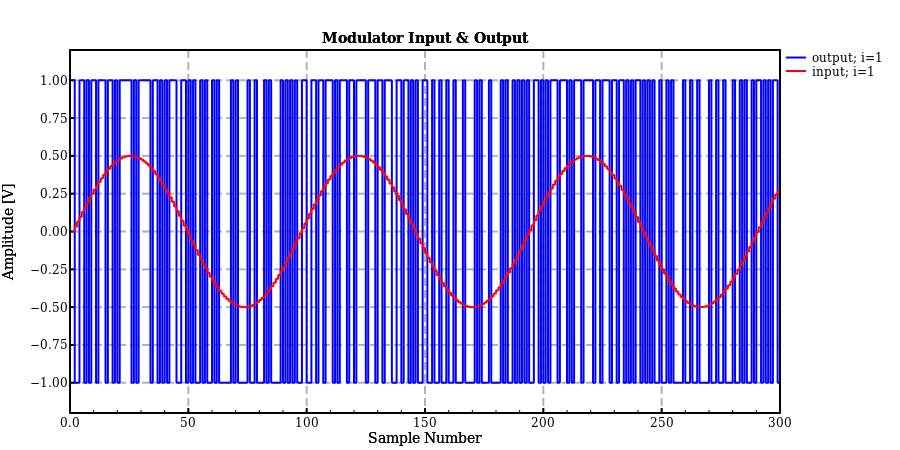

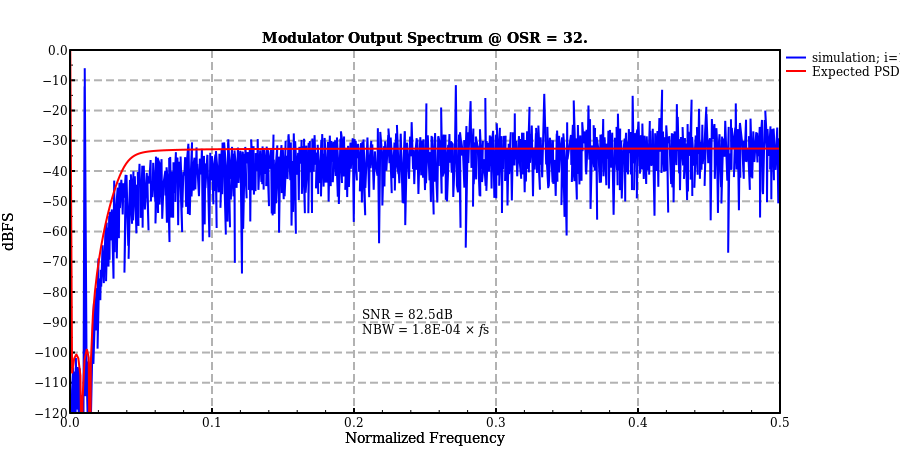

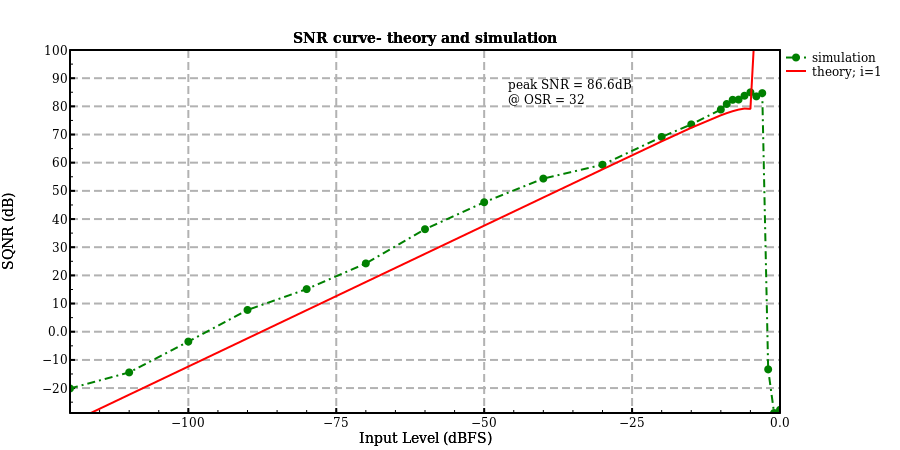

In [3]:
OSR = 32
N = 8192

println("Performing ΔΣ simulation..."); flush(stdout)
#-------------------------------------------------------------------------------
fB = ceil(Int, N/(2*OSR)); ftest=floor(Int, 2/3*fB)
u = 0.5*sin.(2π*ftest/N * (0:N-1)) # half-scale sine-wave input
NTF = synthesizeNTF(5, OSR, opt=1)
v,xn,xmax,y = simulateDSM(u, NTF)
println("\tdone."); flush(stdout)

#Plot modulator signals
#-------------------------------------------------------------------------------
plot = plotModTransient(u, v, y)
	set(plot, xyaxes=set(xmin=0, xmax=300, ymin=-1.2, ymax=1.2))
inlinedisp(plot, AR=2/1)

#Plot output spectrum (simulated vs theory)"
#-------------------------------------------------------------------------------
plot = plotModSpectrum(v, NTF, 3:fB+1, ftest-2,
	title="Modulator Output Spectrum @ OSR = $OSR."
)
inlinedisp(plot, AR=2/1)

#Plot SNR vs input power
plot = plotSNR(v, NTF, OSR,
	title="SNR curve- theory and simulation"
)
inlinedisp(plot, AR=2/1)

# 8th order, 2-level, bandpass modulator

Performing ΔΣ simulation...
	done.


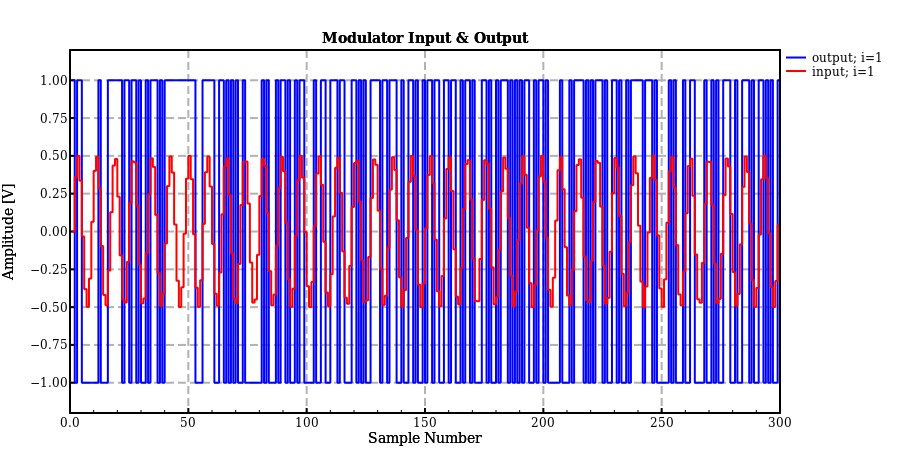

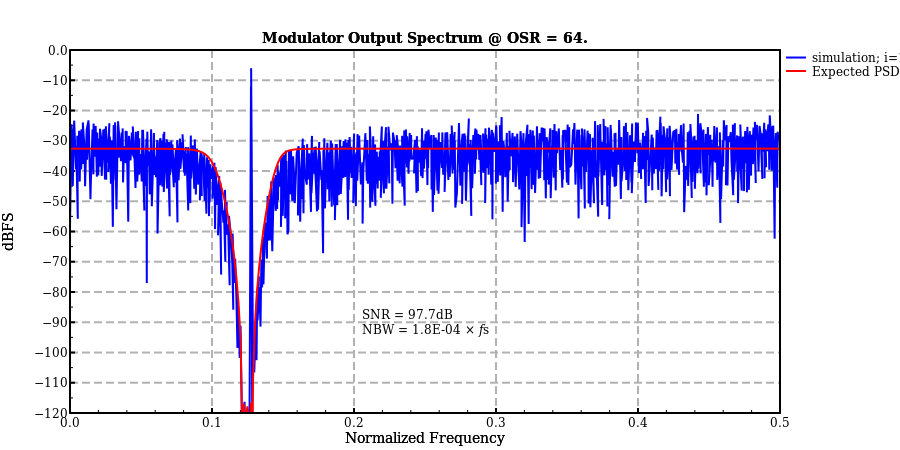

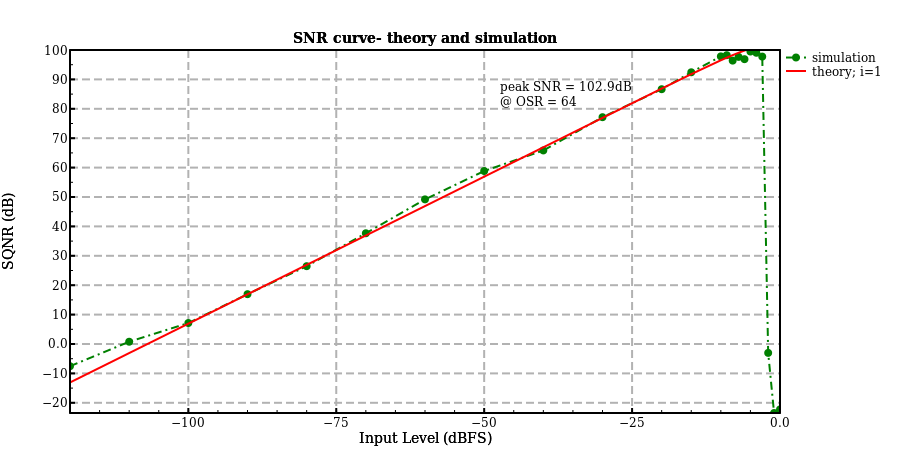

In [4]:
OSR=64
f0 = 1/8
N = 8192

println("Performing ΔΣ simulation..."); flush(stdout)
#-------------------------------------------------------------------------------
fB = ceil(Int, N/(2*OSR)); ftest=round(Int, f0*N + 1/3*fB)
u = 0.5*sin.(2π*ftest/N * (0:N-1)) #half-scale sine-wave input
NTF = synthesizeNTF(8, OSR, opt=1, f0=f0)
v,xn,xmax,y = simulateDSM(u, NTF)
println("\tdone."); flush(stdout)

#Plot modulator signals
#-------------------------------------------------------------------------------
plot = plotModTransient(u, v, y)
	set(plot, xyaxes=set(xmin=0, xmax=300, ymin=-1.2, ymax=1.2))
inlinedisp(plot, AR=2/1)

#Plot output spectrum (simulated vs theory)
#-------------------------------------------------------------------------------
f1 = round(Int, (f0-0.25/OSR)*N)
f2 = round(Int, (f0+0.25/OSR)*N)
plot = plotModSpectrum(v, NTF, f1:f2, ftest-f1+1,
	title="Modulator Output Spectrum @ OSR = $OSR."
)
inlinedisp(plot, AR=2/1)

#Plot SNR vs input power
plot = plotSNR(v, NTF, OSR, f0=f0,
	title="SNR curve- theory and simulation"
)
inlinedisp(plot, AR=2/1)

# 7th order, 15-step, baseband modulator

Performing ΔΣ simulation for H(∞)=[2.0, 8.0]...
	done.


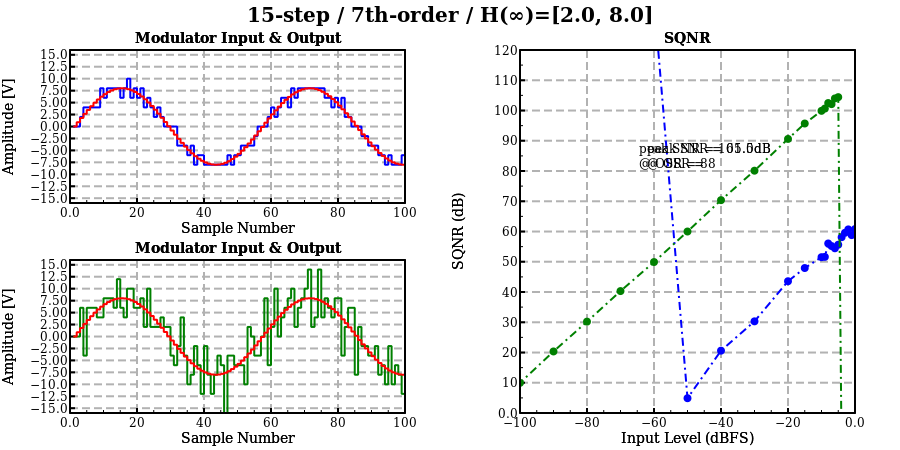

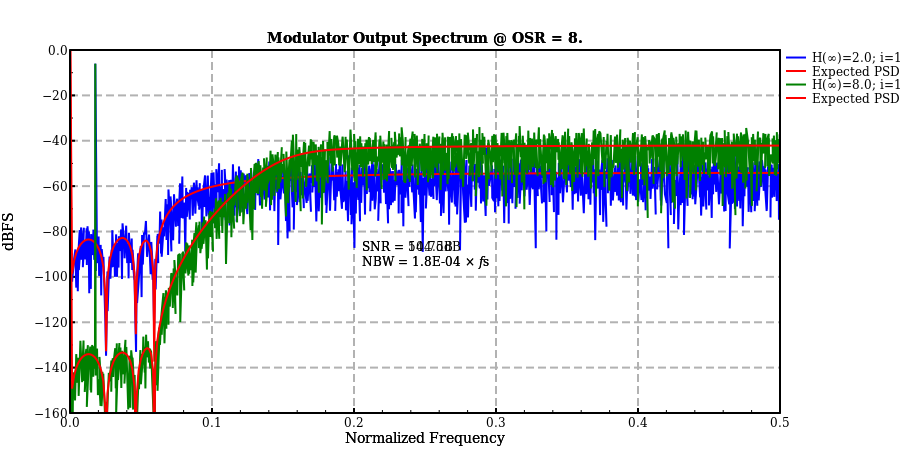

In [5]:
OSR = 8
M = 16
N = 8192
Hinf_list = [2.0, 8.0]
color_list = [:blue, :green]

println("Performing ΔΣ simulation for H(∞)=$(Hinf_list)..."); flush(stdout)
#-------------------------------------------------------------------------------
id_list = [@sprintf("H(∞)=%.1f", Hinf) for Hinf in Hinf_list]
fB = ceil(Int, N/(2*OSR)); ftest = floor(Int, 2/7*fB)
u = 0.5*M*sin.(2π*ftest/N * (0:N-1)) #half-scale sine-wave input
NTF = [synthesizeNTF(7, OSR, opt=1, H_inf=Hinf) for Hinf in Hinf_list]
v = [simulateDSM(u, H, M+1)[1] for H in NTF] #simulateDSM(..)[1] is mod output, v.
println("\tdone."); flush(stdout)

#Plot input/output characteristics of ΔΣ simulations
#-------------------------------------------------------------------------------
ioplotc = cons(:plot_collection, title="15-step / 7th-order / H(∞)=$(Hinf_list)")

#Plot input & output transients:
for i in keys(v) #Each simulated output
	local plot = plotModTransient(u, v[i], color=color_list[i], legend=false)
		set(plot, xyaxes=set(xmin=0, xmax=100, ymin=-16, ymax=16))
	push!(ioplotc, plot)
end

#Append SNR vs input curves:
plot = plotSNR(v, NTF[1], OSR, nlev=M+1, color=color_list[1], legend=false, title="SQNR")
plotSNR!(plot, v, NTF[2], OSR, nlev=M+1, color=color_list[2])
	set(plot, xyaxes=set(xmin=-100, xmax=0, ymin=0, ymax=120))
push!(ioplotc, plot)

#Specify plot locations to help readability:
ioplotc.bblist = [ #Format plot locations
	BoundingBox(0, 0.5, 0, 0.5), #1st modulator transient
	BoundingBox(0, 0.5, 0.5, 1), #2nd modulator transient
	BoundingBox(0.5, 1, 0, 1), #SNR curve
]
inlinedisp(ioplotc, AR=2/1)

#Plot output spectrum (simulated vs theory)
#-------------------------------------------------------------------------------
plot = plotModSpectrum(title="Modulator Output Spectrum @ OSR = $OSR.")
	set(plot, xyaxes=set(ymin=-160))
for i in keys(NTF)
	plotModSpectrum!(plot, v[i], NTF[i], 3:fB+1, ftest-2, sp2p=1.0*M,
		id=id_list[i], color=color_list[i]
	)
end
inlinedisp(plot, AR=2/1)

# DONE